# 电子游戏销售数据分析报告
数据来源于kaggle

## 一、读取数据

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']  #指定默认字体  
plt.rcParams['axes.unicode_minus']=False  #解决负号'-'显示为方块的问题


%matplotlib inline

In [3]:
data = pd.read_csv('vgsales.csv')

In [4]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


- 列标/字段：
- 总销售额排名，游戏名，发布平台，发布日期，类型，发行商，各国销售额（百万），全球销售额

- 根据数据情况，取下面几个进行分析：

- 爆款（10个）信息
- 游戏销售额情况：年份、平台、发布商、游戏类型、地区之间

## 二、了解数据&数据清洗

In [5]:
data.shape

(16598, 11)

In [6]:
#查看数据
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


- 从后面销售情况看，销售均值靠近于较大四分位数，说明数据受到极大值影响，拔高均值

In [8]:
# 空值清理
data = data.dropna()
# 选取需要选择的列
data =  data[data.columns[1:]]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 10 columns):
Name            16291 non-null object
Platform        16291 non-null object
Year            16291 non-null float64
Genre           16291 non-null object
Publisher       16291 non-null object
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [9]:
data.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [10]:
data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [11]:
data.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [12]:
# 重置索引
index = list(range(len(data)))
data.index = index

In [13]:
data['Year'] = data['Year'].astype(int)
#得到不重复的日期值
time_zrea = np.unique(data['Year'])
# print(time_zrea) 因数据统计的是2017年以前的数据，所以年份为2020的数据错误

In [14]:
max_entry = data['Year'].idxmax()
print(max_entry)
max_entry = data.iloc[max_entry]
pd.DataFrame(max_entry).T

5860


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5860,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0,0,0.02,0.29


In [15]:
#从网上查的正确数据为2009 替换错误值
data['Year'] = data['Year'].replace(2020, 2009)
print("Max Year Value: ", data['Year'].max())

Max Year Value:  2017


## 三、数据分析&可视化

### 1.可视化爆款（10个）游戏信息

In [16]:
# 查看销售得最好的10款游戏信息
top10games = data.sort_values(by='Global_Sales', ascending=False).head(10)
top10games

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


结论：
- 发行商全为Nintendo（任天堂），说明Nintendo发行的游戏质量很高，容易风靡全球。
- 前十款游戏中50%游戏平台为Wii(任天堂发行的游戏机，主打体感和家庭娱乐)。说明该类游戏容易成为爆款。
- 前十名的游戏多为动作、竞技类型，音乐等其他游戏玩者较少，这也和日常所见相符

### 2.不同年份总销售额对比情况

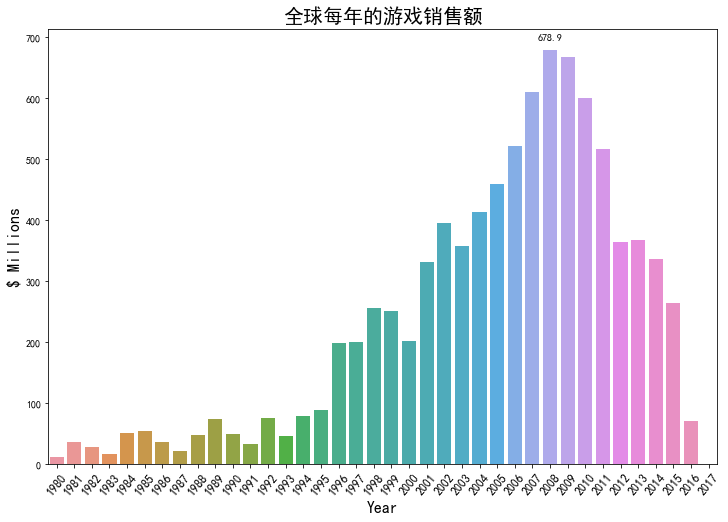

In [17]:
y = data.groupby(['Year']).sum()
y = y['Global_Sales']
x = y.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.barplot(y = y, x = x)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='$ Millions', fontsize=16)
ax.set_title(label='全球每年的游戏销售额', fontsize=20)
ax.text(28,y.values[np.argmax(y.values)]+16,y.values[np.argmax(y.values)].round(2),ha='center')
    
plt.show();

结论：

- 2008年之前销售额逐年升高，并2008年达到年总销售额最高峰，之后年销售额显著下降
- 根据不同行业的一些发展规律，初步分析/猜测：游戏市场达到饱和，没有过多优质新颖游戏，同质化较为严重，所以整体显著下滑，应该是所谓的“寒冬”时期

### 3.不同平台总销售额对比情况

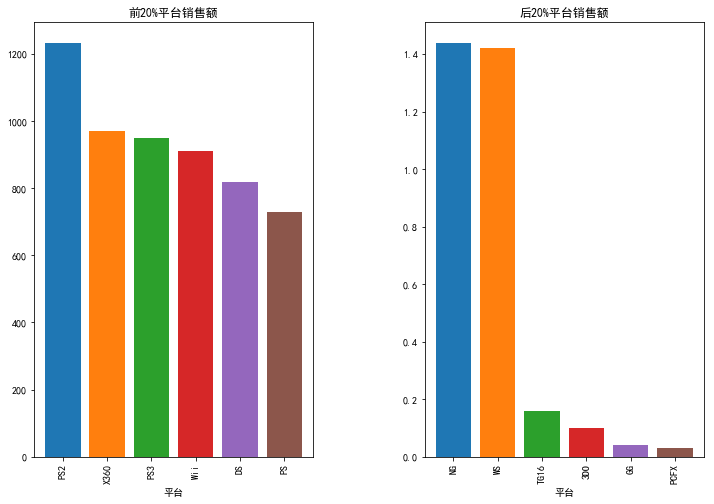

In [18]:
# 不同平台的总销售额
totalsales_by_pf = data['Global_Sales'].groupby(data['Platform']).sum()
# 定义销售额前20%的平台为优秀，查看优秀类的销售额情况
good_pf = totalsales_by_pf.sort_values(ascending=False).head(int(len(totalsales_by_pf)/5))
#定义后20%平台
bad_pf = totalsales_by_pf.sort_values(ascending=False).tail(int(len(totalsales_by_pf)/5))


fig,axes = plt.subplots(1,2,figsize=(12,8))

ax1 = good_pf.plot(kind='bar',ax=axes[0],width=0.8)
ax1.set_title('前20%平台销售额',fontsize=12)
ax1.set_xlabel('平台')

ax2 = bad_pf.plot(kind='bar',ax=axes[1],width=0.8)
ax2.set_title('后20%平台销售额',fontsize=12)
ax2.set_xlabel('平台')

plt.subplots_adjust(wspace=0.4)
plt.show()

### 4.不同发布商总销售额对比情况

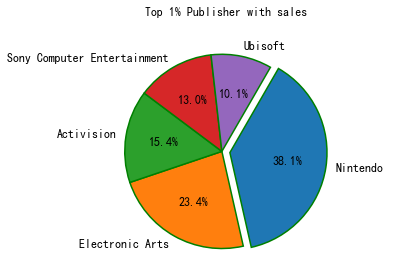

In [19]:
# 不同发布商的总销售额
totalsales_by_p = data['Global_Sales'].groupby(data['Publisher']).sum()
# totalsales_by_p

# 定义前1%为优秀，取优秀部分进行分析
good_p = totalsales_by_p.sort_values(ascending=False).head(int(len(totalsales_by_p)/100))
# good_p

# 设置排名第一的出
explode = [0 for i in range(len(good_p))]
explode[0] = 0.1


# 饼状图
plt.pie(
        x = good_p.values,            # 绘图数据
        explode = explode,  # 突出显示大专人群的形式
        labels = good_p.index,    # 添加教育水平标签
        autopct = '%.1f%%', # 设置百分比的格式，这里保留一位小数
        startangle = 60,     # 设置饼图的初始角度
        radius = 1.2,         # 设置饼图的半径
        counterclock = False, # 是否逆时针，这里设置为顺时针方向
        # 设置饼图内外边界的属性值
        wedgeprops = {'linewidth': 1.5, 'edgecolor':'green'},
        # 设置文本标签的属性值
        textprops = {'fontsize':12, 'color':'k'},
        frame = 0 )         # 是否显示饼图的图框，这里设置不显示
                            # 设为1就显示外坐标系，然后加上去除刻度的语句
# 避免因为比例压缩为椭圆
plt.axis('equal') 
plt.title('Top 1% Publisher with sales', y=1.1)
plt.show()

In [20]:
# 查看对应的平均值情况
print("Top 1% Publisher with mean_unitgame:")
mean_value = data['Global_Sales'].groupby(data['Publisher']).mean()
mean_value.sort_values(ascending=False).head(int(len(totalsales_by_p)/100))

Top 1% Publisher with mean_unitgame:


Publisher
Palcom                 4.170000
Red Orb                2.620000
Nintendo               2.563836
Arena Entertainment    2.360000
UEP Systems            2.250000
Name: Global_Sales, dtype: float64

总结

- 任天堂依旧拔得头筹，其次为艺电公司，（优秀发布商中）其他发布商总销售额占比较为均衡，这些公司均为大公司，可见游戏售卖情况与公司规模有一定关系
- 但平均值情况进一步反映出：并不是总销售额高的公司对应游戏单价高，大公司口碑效应+好的销售渠道等情况达到一定大的规模之后才形成高的业绩，而相对较小的公司也能用好的游戏从每笔游戏销售中获取到高的利润。

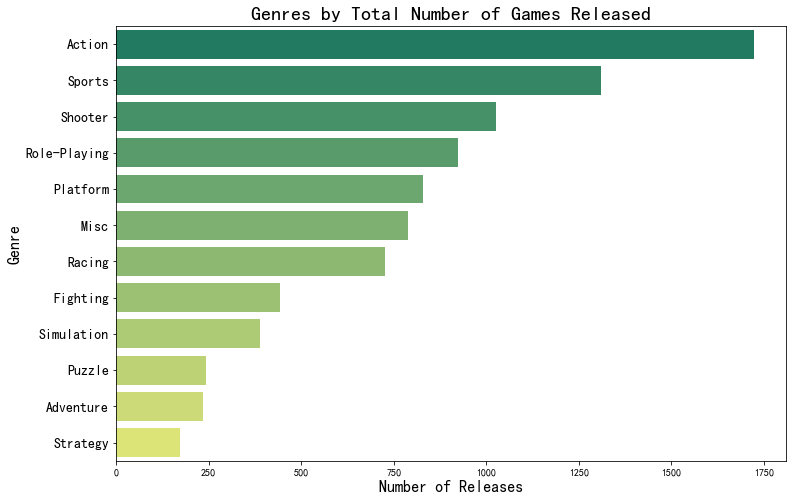

In [27]:
rel = data['Global_Sales'].groupby(data['Genre']).sum()
rel = pd.DataFrame(rel.sort_values(ascending=False))
genres = rel.index
rel.columns = ['Releases']
colors = sns.color_palette("summer", len(rel))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = genres , x = 'Releases', data=rel, orient='h', palette=colors)
ax.set_xlabel(xlabel='Number of Releases', fontsize=16)
ax.set_ylabel(ylabel='Genre', fontsize=16)
ax.set_title(label='Genres by Total Number of Games Released', fontsize=20)
ax.set_yticklabels(labels = genres, fontsize=14)
plt.show();

总结：

- 如同爆款信息中分析到的，动作类型的游戏受众度更高
- 策略、解谜类型游戏的玩者较少
- 看到后面冒险类型游戏销量较少，猜测：探险类游戏出新游较难所以可玩性不高最终导致销售额低？